 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [24]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import hvplot.pandas

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [25]:
# Reading whale returns
whale_returns_df = pd.read_csv(Path("Resources/whale_returns.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\3146305396.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df = pd.read_csv(Path("Resources/whale_returns.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)


In [26]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [27]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [28]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(Path("Resources/algo_returns.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\144039507.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df = pd.read_csv(Path("Resources/algo_returns.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)


In [29]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [30]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [31]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(Path("Resources/sp500_history.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\1232984504.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history_df = pd.read_csv(Path("Resources/sp500_history.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\1232984504.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df = pd.read_csv(Path("Resources/sp500_history.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)


In [32]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [33]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [34]:
# Calculate Daily Returns
sp500_history_df["Close"] = sp500_history_df["Close"].pct_change()

In [35]:
# Drop nulls
sp500_history_df = sp500_history_df.dropna().copy()

In [36]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns={"Close": "SP500 Close"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

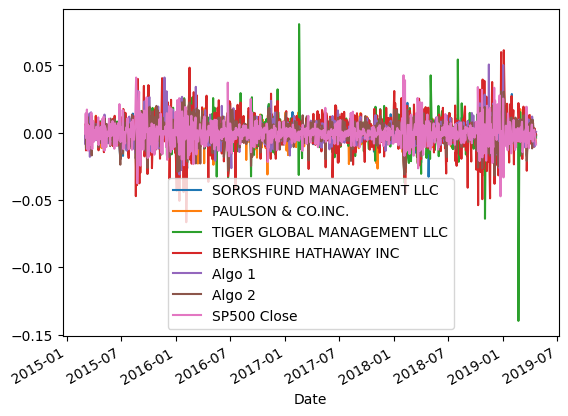

In [38]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

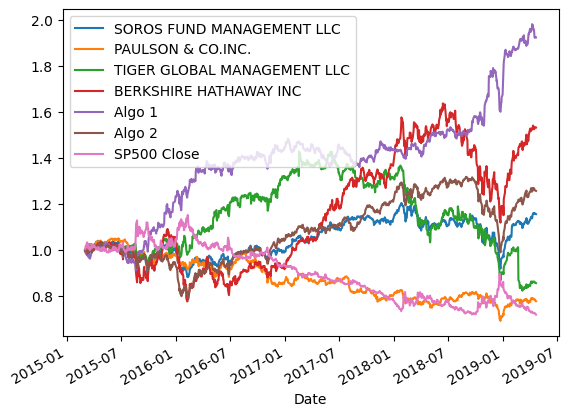

In [66]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

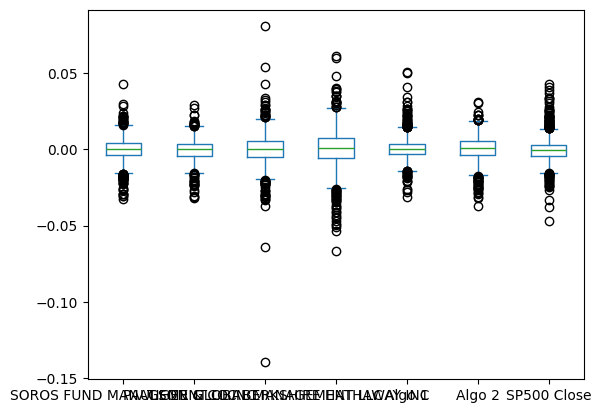

In [70]:
# Box plot to visually show risk
combined_df.plot.box()

### Calculate Standard Deviations

In [75]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500 Close                    0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [74]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_std["SP500 Close"]
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std[daily_std > sp500_std]
print(riskier_portfolios)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

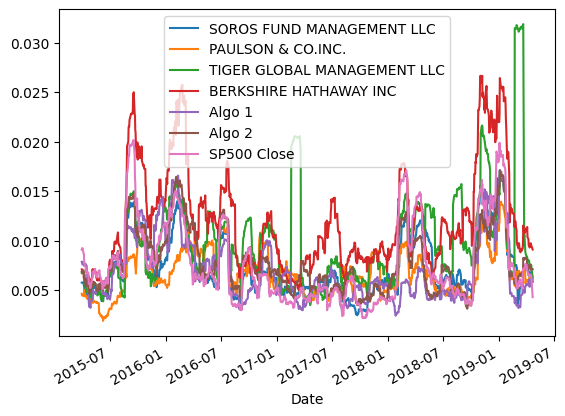

In [77]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()


### Calculate and plot the correlation

In [78]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

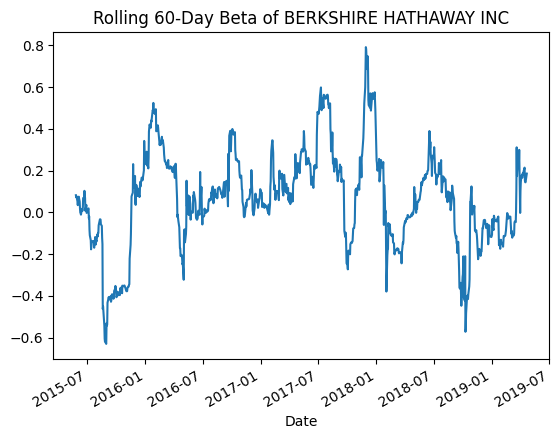

In [79]:
# Calculate covariance of a single portfolio
whale_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["SP500 Close"])
# Calculate variance of S&P 500
sp500_variance = combined_df["SP500 Close"].var()
# Computing beta    
whale_beta = whale_covariance / sp500_variance
# Plot beta trend
rolling_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["SP500 Close"])
rolling_variance = combined_df["SP500 Close"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title="Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC")



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [80]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(span=21, adjust=False).mean()
print(ewm)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                  -0.000948           -0.004233   
2015-03-05                  -0.000496           -0.003478   
2015-03-06                  -0.001170           -0.003486   
2015-03-09                  -0.001011           -0.002785   
...                               ...                 ...   
2019-04-15                   0.001953            0.000529   
2019-04-16                   0.002021            0.000516   
2019-04-17                   0.001574           -0.000119   
2019-04-18                   0.001563            0.000003   
2019-04-22                   0.001185           -0.000664   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500 Close                   -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

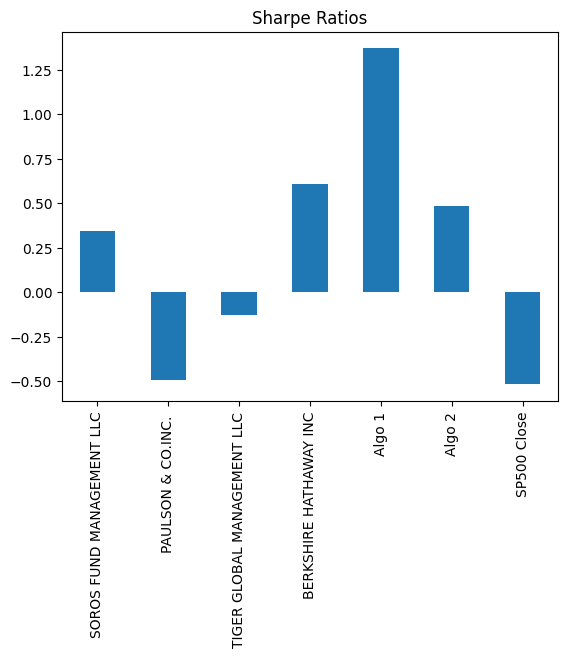

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo1 seems to have the highest sharpe ratio indicating the best performance given the risk undertaken. Algo 2 is behind Berkshire, but still a relatively high bar, so would have to conclude algo trading portfolios do make a difference.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [83]:
# Reading data from 1st stock
aapl_df = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
#rename column to close
aapl_df = aapl_df.rename(columns={"NOCP": "AAPL Close"})
#change the data type to float
aapl_df["AAPL Close"] = aapl_df["AAPL Close"].astype("float")
aapl_df.head()

C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\2839235080.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,AAPL Close
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [84]:
# Reading data from 2nd stock
goog = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
#rename column to close
goog = goog.rename(columns={"NOCP": "GOOG Close"})
#change the data type to float
goog["GOOG Close"] = goog["GOOG Close"].astype("float")
goog.head()


C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\1809138461.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,GOOG Close
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [85]:
# Reading data from 3rd stock
cost_df = pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
#rename column to close
cost_df = cost_df.rename(columns={"NOCP": "COST Close"})
#change the data type to float
cost_df["COST Close"] = cost_df["COST Close"].astype("float")
cost_df.head()


C:\Users\ryele\AppData\Local\Temp\ipykernel_6588\3504922318.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,Symbol,COST Close
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [86]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([aapl_df, goog, cost_df], axis="columns", join="inner")
combined_stocks_df.head()

,Symbol,AAPL Close,Symbol,GOOG Close,Symbol,COST Close
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [87]:
# Reset Date index
combined_stocks_df.index = combined_stocks_df.index.normalize()

In [89]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df = combined_stocks_df.drop(columns=["Symbol"])

In [90]:
# Calculate daily returns
daily_returns = combined_stocks_df.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

,AAPL Close,GOOG Close,COST Close
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [93]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")
combined_returns = combined_returns.rename(columns={0: "Portfolio"})
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close,Portfolio
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112


In [94]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [99]:
# Calculate the annualized `std`
combined_std = combined_returns.std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

<Axes: >

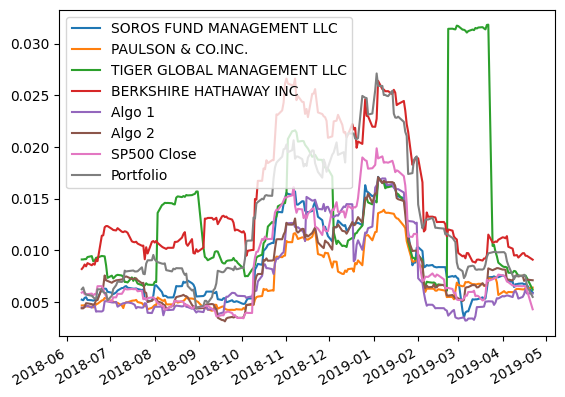

In [100]:
# Calculate rolling standard deviation
combined_rolling_std = combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
combined_rolling_std.plot()



### Calculate and plot the correlation

In [96]:
# Calculate and plot the correlation
correlation = combined_returns.corr()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [97]:
# Calculate and plot Beta
covariance = combined_returns["Portfolio"].cov(combined_returns["SP500 Close"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [101]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_std)

<Axes: title={'center': 'Sharpe Ratios'}>

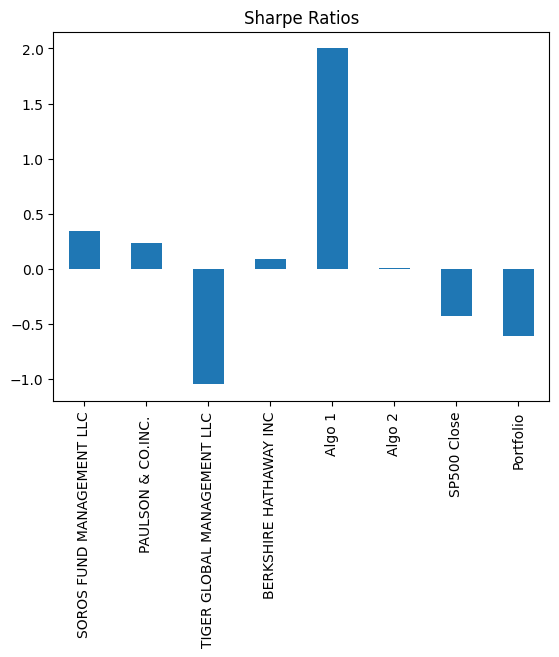

In [102]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

the combined portfolio still does worse than the algorithmic portfolios.
